# Random Forest Model

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# นำเข้าข้อมูล

In [39]:
# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv('DataComsci.csv')  # อ่านข้อมูลจากไฟล์ CSV

# ดูตัวอย่างข้อมูล
print(data.describe())

print(data.columns.tolist())

data

       GRADUATEYEAR     STUDENTID  GPA_graduate
count    343.000000  3.430000e+02    343.000000
mean    2564.303207  1.002616e+08      2.610554
std        1.389672  1.621539e+04      0.413158
min     2562.000000  1.002056e+08      2.000000
25%     2563.000000  1.002492e+08      2.310000
50%     2564.000000  1.002611e+08      2.540000
75%     2566.000000  1.002712e+08      2.815000
max     2566.000000  1.002872e+08      3.970000
['GRADUATEYEAR', 'STUDENTID', 'ASEAN Folklore', 'Algorithm Design and Analysis', 'Artificial  Intelligence', 'Arts in Daily Life', 'Calculus for Science', 'Civilization and Local Wisdom', 'Cloud Computing', 'Communicative English for Academic Analysis in Computer Technology', 'Communicative English for Research Presentation in Computer Technology', 'Communicative English for Specific Purposes in Computer Technology', 'Computer Architecture', 'Computer Graphics and Animation', 'Computer Network and Data Communication', 'Consumption in Daily-life', 'Data Mining Te

,GRADUATEYEAR,STUDENTID,ASEAN Folklore,Algorithm Design and Analysis,Artificial Intelligence,Arts in Daily Life,Calculus for Science,Civilization and Local Wisdom,Cloud Computing,Communicative English for Academic Analysis in Computer Technology,...,Thai Language for Academic Communication,Thai Language for Communication in the 21st Century,Thai State and the World Community,The King''s Philosophy for Living,Ways of Living in the Digital Age,Web Technology,Western Music in Daily Life,World Mythology,XML and Web Services,GPA_graduate
0,2562,100205568,B+,D+,D+,NaN,D+,NaN,NaN,B+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10
1,2562,100205606,NaN,C,C+,NaN,D,NaN,NaN,B+,...,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,2.00
2,2564,100215265,NaN,D,F,NaN,F,NaN,NaN,A,...,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,2.01
3,2562,100225543,NaN,C,D,NaN,F,B+,NaN,D,...,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,2.10
4,2565,100225544,NaN,D+,D,NaN,F,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2566,100282344,NaN,D+,C+,NaN,D,A,NaN,C,...,NaN,NaN,NaN,NaN,C+,NaN,NaN,NaN,NaN,2.34
339,2566,100282356,NaN,C+,A,NaN,C+,A,NaN,C,...,B,NaN,NaN,NaN,C+,NaN,NaN,NaN,NaN,3.19
340,2566,100282359,NaN,D+,D,NaN,C,NaN,NaN,B,...,NaN,C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68
341,2566,100282360,NaN,C+,D+,NaN,D,NaN,NaN,B,...,B,NaN,NaN,NaN,C+,NaN,NaN,NaN,NaN,2.52


# ขั้นตอนที่ 1: เตรียมข้อมูล

In [40]:
# แปลงเกรดเป็นค่าตัวเลข
grade_mapping = {'A': 4.0, 'B+': 3.5, 'B': 3.0, 'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0, 'F': 0.0}
data.replace(grade_mapping, inplace=True)

# แทนค่าที่หายไปด้วยค่าเฉลี่ยของแต่ละคอลัมน์สำหรับคอลัมน์ตัวเลข
data.fillna(data.mean(numeric_only=True), inplace=True)

# เลือกฟีเจอร์ที่เกี่ยวข้อง (รายวิชาที่จะใช้ทำนาย GPA)
features = ['ASEAN Folklore', 'Algorithm Design and Analysis', 'Artificial  Intelligence', 'Arts in Daily Life', 'Calculus for Science', 
            'Civilization and Local Wisdom', 'Cloud Computing', 'Communicative English for Academic Analysis in Computer Technology', 
            'Communicative English for Research Presentation in Computer Technology', 
            'Communicative English for Specific Purposes in Computer Technology', 'Computer Architecture', 'Computer Graphics and Animation', 
            'Computer Network and Data Communication', 'Consumption in Daily-life', 'Data Mining Techniques', 'Data Science', 'Data Structure', 
            'Data Warehousing and Applications', 'Database Systems', 'Developmental English', 'Digital Image Processing', 'Digital Marketing', 
            'Discrete Mathematics for Computer Science', 'Electronic Commerce', 'Energy and Technology Around Us', 
            'English Critical Reading for Effective Communication', 'English Listening and Speaking for Communication', 
            'English Writing for Effective Communication', 'Follklore and Beauty', 'Food and Life Style', 'Functional Programming', 
            'Fundamental English', 'Fundamental Laws for Quality of Life', 'Fundamentals of Programming', 'General Chemistry', 'General Physics', 
            'Group Dynamics and Teamwork', 'Happiness with Hobbies', 'Health Sociology', 'History and Development of Computer Technology', 
            'Human Behavior', 'Information Science for Study and Research', 'Internet Geographic Information Systems', 'Internet Programming', 
            'Introduction to Computer Information Science', 'Introduction to Data Management in Digital Era', 'Introduction to Geoinformatics', 
            'Introduction to Robotics', 'Introductory Biology', 'Introductory Chemistry', 'Introductory Mathematics', 'Introductory Physics', 
            'Language, Society and Culture', 'Leadership and Compassion', 'Life Privacy', 'Life Skills', 'Life and Health', 
            'Linear Algebra and Applications', 'Living Management', 'Local Folklore', 'Man and Environment', 
            'Mathematics and Statistics in Everyday Life', 'Mathematics for Science', 'Media Literacy', 'Meditation for Life Development', 
            'Mobile Application Development', 'Multimedia Application Development', 'Multimedia and Web Technology', 'Music Studies in Thai Culture', 
            'Naresuan Studies', 'Network Security', 'Numerical Methods', 'Object Oriented Programming', 'Object-Oriented Analysis and Design', 
            'Operating Systems', 'Philosophy of Life for Sufficient Living', 'Philosophy of Science', 'Politics, Economy and Society', 
            'Population and Reproductive Health', 'Printmaking', 'Production Management', 'Programming Languages', 'Python Programming', 
            'Reading in the Digital Age Century', 'Recreation in School and Community', 'Religions and Ethics for Social Development', 
            'Science in Everyday Life', 'Seminar ', 'Sensing and Actuation for Internet of Things', 'Social Innovation', 
            'Social Innovation for Creative Development', 'Social Problems and Current Development Issue', 
            'Social Problems and Current Development Issues', 'Software Engineering', 'Special Topics in Computer Science', 
            'Statistical Analysis', 'System Analysis and Design', 'Thai Customs and Religions in Thailand', 'Thai Language Skills', 
            'Thai Language for Academic Communication', 'Thai Language for Communication in the 21st Century', 'Thai State and the World Community', 
            "The King''s Philosophy for Living", 'Ways of Living in the Digital Age', 'Web Technology', 'Western Music in Daily Life', 
            'World Mythology', 'XML and Web Services']  # แทนที่ด้วยรายชื่อฟีเจอร์ที่คุณต้องการ

X = data[features]  # สร้าง DataFrame สำหรับฟีเจอร์

# แปลงฟีเจอร์ที่เป็นประเภทข้อความ (categorical) ถ้ามี
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    # ลบค่า NaN และตรวจสอบให้แน่ใจว่าคอลัมน์มีประเภทข้อมูลเป็นข้อความอย่างเดียว
    if X[col].isnull().all():  # ตรวจสอบว่าคอลัมน์เป็น NaN ทั้งหมด
        continue
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # แปลงเป็นสตริงเพื่อหลีกเลี่ยงประเภทข้อมูลผสม
        label_encoders[col] = le

# ตัวแปรเป้าหมาย (GPA)
y = data['GPA_graduate']

### ตรวจสอบขนาดของ X และ y

In [41]:
print(X.shape)
print(y.shape)

(343, 108)
(343,)


# ขั้นตอนที่ 2: แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ขั้นตอนที่ 3: สร้างโมเดล Random Forest และฝึกสอน

In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# ขั้นตอนที่ 4: ทำนายโดยใช้ชุดทดสอบ

In [44]:
y_pred = model.predict(X_test)

# ขั้นตอนที่ 5: ประเมินผลโมเดล

In [45]:
mse = mean_squared_error(y_test, y_pred)  # คำนวณ Mean Squared Error
r2 = r2_score(y_test, y_pred)  # คำนวณ R-Squared

# แสดงค่า feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # เรียงลำดับค่าจากมากไปน้อย

# แสดงผลลัพธ์

In [46]:
# แสดงผลลัพธ์
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared: {r2}')
print('')

# แสดงผล
print("Feature Importances:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]:.4f}")

Mean Squared Error (MSE): 0.012963011884058007
R-Squared: 0.9010800010322045

Feature Importances:
1. Feature 10: 0.2436
2. Feature 72: 0.1239
3. Feature 96: 0.0859
4. Feature 1: 0.0549
5. Feature 12: 0.0513
6. Feature 93: 0.0476
7. Feature 57: 0.0471
8. Feature 71: 0.0322
9. Feature 18: 0.0299
10. Feature 2: 0.0237
11. Feature 95: 0.0229
12. Feature 8: 0.0202
13. Feature 4: 0.0179
14. Feature 22: 0.0149
15. Feature 9: 0.0148
16. Feature 16: 0.0139
17. Feature 62: 0.0135
18. Feature 27: 0.0119
19. Feature 7: 0.0095
20. Feature 48: 0.0083
21. Feature 74: 0.0075
22. Feature 35: 0.0074
23. Feature 65: 0.0065
24. Feature 88: 0.0058
25. Feature 94: 0.0056
26. Feature 20: 0.0054
27. Feature 44: 0.0052
28. Feature 15: 0.0051
29. Feature 43: 0.0048
30. Feature 67: 0.0046
31. Feature 34: 0.0044
32. Feature 19: 0.0036
33. Feature 31: 0.0035
34. Feature 33: 0.0033
35. Feature 87: 0.0030
36. Feature 14: 0.0020
37. Feature 98: 0.0019
38. Feature 52: 0.0018
39. Feature 68: 0.0017
40. Feature 73: 0.0

# กราฟแสดงผล

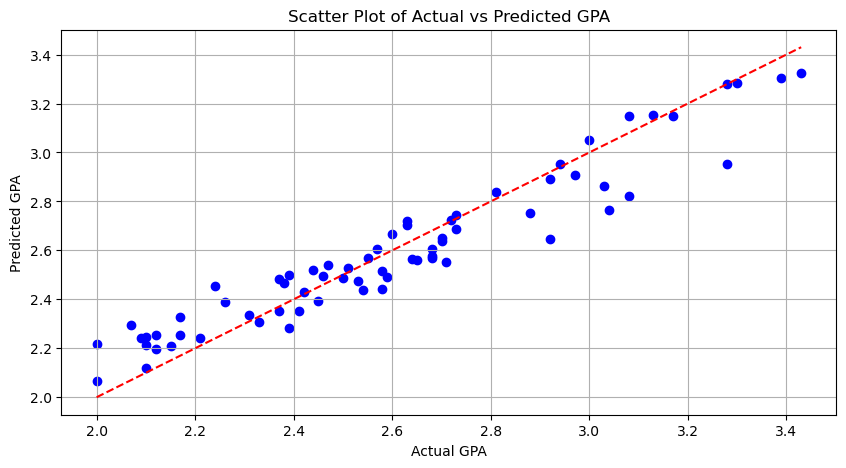

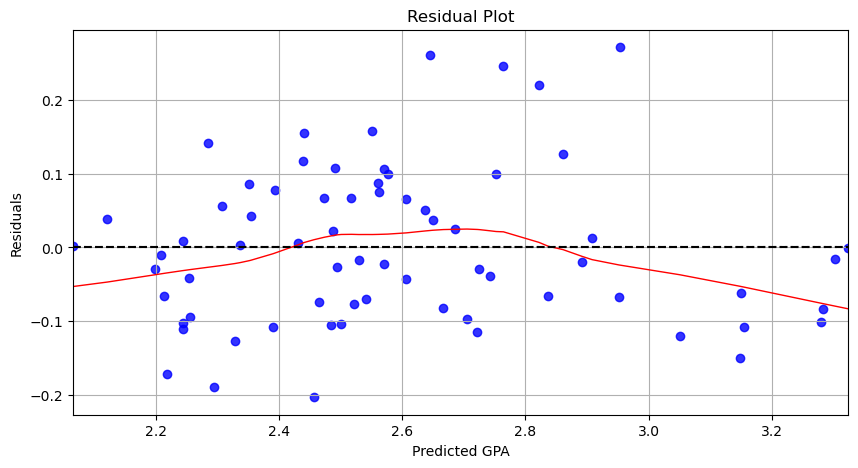

In [47]:
# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Scatter Plot of Actual vs Predicted GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.grid()
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', 
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted GPA')
plt.ylabel('Residuals')
plt.grid()
plt.show()